<a href="https://colab.research.google.com/github/daniballester-ai/calculo_manual_metricas_classificacao/blob/main/metricas_classificacao_na_mao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow

In [5]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd

In [6]:
tf.__version__

'2.18.0'

In [7]:
%load_ext tensorboard

In [8]:
logdir='log'

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.1229 - loss: 2.4109 - val_accuracy: 0.1235 - val_loss: 2.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.1215 - loss: 2.3026 - val_accuracy: 0.1235 - val_loss: 2.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 30ms/step - accuracy: 0.1203 - loss: 2.3026 - val_accuracy: 0.1235 - val_loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.1205 - loss: 2.3026 - val_accuracy: 0.1235 - val_loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 37ms/step - accuracy: 0.1187 - loss: 2.3026 - val_accuracy: 0.1235 - val_loss: 2.3026


In [21]:
y_test = test_labels
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [17]:
classes=[0,1,2,3,4,5,6,7,8,9]

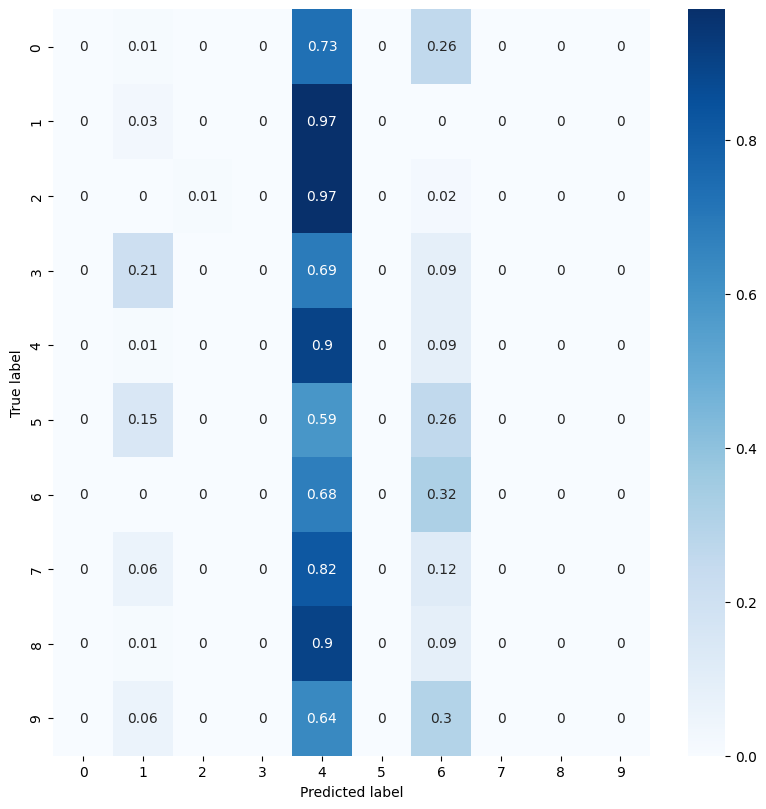

In [23]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Cálculo das métricas
Calcular manualmente as métricas de avaliação de modelos de classificação (acurácia, sensibilidade, especificidade, precisão e F-score) em português do Brasil, utilizando as fórmulas fornecidas na imagem "metricas.png" e uma matriz de confusão arbitrária, sem o uso de bibliotecas.

## Extrair valores da matriz de confusão

Da matriz de confusão `con_mat`, extrair os valores para Verdadeiros Positivos (VP), Verdadeiros Negativos (VN), Falsos Positivos (FP) e Falsos Negativos (FN) para cada classe.


In [25]:
tp = {}
tn = {}
fp = {}
fn = {}

for i in range(10):
    tp[i] = con_mat[i, i]
    fp[i] = con_mat[:, i].sum() - tp[i]
    fn[i] = con_mat[i, :].sum() - tp[i]
    tn[i] = con_mat.sum() - tp[i] - fp[i] - fn[i]

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

True Positives (TP): {0: np.int32(0), 1: np.int32(37), 2: np.int32(11), 3: np.int32(0), 4: np.int32(882), 5: np.int32(0), 6: np.int32(305), 7: np.int32(0), 8: np.int32(0), 9: np.int32(0)}
True Negatives (TN): {0: np.int64(9020), 1: np.int64(8363), 2: np.int64(8965), 3: np.int64(8990), 4: np.int64(1961), 5: np.int64(9108), 6: np.int64(7839), 7: np.int64(8972), 8: np.int64(9026), 9: np.int64(8991)}
False Positives (FP): {0: np.int64(0), 1: np.int64(502), 2: np.int64(3), 3: np.int64(0), 4: np.int64(7057), 5: np.int64(0), 6: np.int64(1203), 7: np.int64(0), 8: np.int64(0), 9: np.int64(0)}
False Negatives (FN): {0: np.int64(980), 1: np.int64(1098), 2: np.int64(1021), 3: np.int64(1010), 4: np.int64(100), 5: np.int64(892), 6: np.int64(653), 7: np.int64(1028), 8: np.int64(974), 9: np.int64(1009)}


## Calcular acurácia

Implementar a fórmula para acurácia usando os valores extraídos.


In [26]:
total_tp = sum(tp.values())
total_samples = con_mat.sum()
accuracy = total_tp / total_samples
print(f"Acurácia geral: {accuracy:.4f}")

Acurácia geral: 0.1235


## Calcular sensibilidade (recall)

Implementar a fórmula para sensibilidade para cada classe.


In [28]:
sensibilidade = {}

for i in range(10):
    if (tp[i] + fn[i]) > 0:
        sensibilidade[i] = tp[i] / (tp[i] + fn[i])
    else:
        sensibilidade[i] = 0.0

print("Sensibilidade para cada classe:", sensibilidade)

Sensibilidade para cada classe: {0: np.float64(0.0), 1: np.float64(0.03259911894273128), 2: np.float64(0.01065891472868217), 3: np.float64(0.0), 4: np.float64(0.8981670061099797), 5: np.float64(0.0), 6: np.float64(0.31837160751565763), 7: np.float64(0.0), 8: np.float64(0.0), 9: np.float64(0.0)}


## Calcular especificidade

Implementar a fórmula para especificidade para cada classe.


In [29]:
especificidade = {}

for i in range(10):
    if (tn[i] + fp[i]) > 0:
        especificidade[i] = tn[i] / (tn[i] + fp[i])
    else:
        especificidade[i] = 0.0

print("Especificidade para cada classe:", especificidade)

Especificidade para cada classe: {0: np.float64(1.0), 1: np.float64(0.9433728144388043), 2: np.float64(0.9996654772524531), 3: np.float64(1.0), 4: np.float64(0.21745398092703483), 5: np.float64(1.0), 6: np.float64(0.8669542136695422), 7: np.float64(1.0), 8: np.float64(1.0), 9: np.float64(1.0)}


## Calcular precisão

Implementar a fórmula para precisão para cada classe.


In [30]:
precisao = {}

for i in range(10):
    if (tp[i] + fp[i]) > 0:
        precisao[i] = tp[i] / (tp[i] + fp[i])
    else:
        precisao[i] = 0.0

print("Precisão para cada classe:", precisao)

Precisão para cada classe: {0: 0.0, 1: np.float64(0.0686456400742115), 2: np.float64(0.7857142857142857), 3: 0.0, 4: np.float64(0.1110971155057312), 5: 0.0, 6: np.float64(0.20225464190981432), 7: 0.0, 8: 0.0, 9: 0.0}


## Calcular f-score

Implementar a fórmula para F-score para cada classe.


In [31]:
f_score = {}

for i in range(10):
    if (precisao[i] + sensibilidade[i]) > 0:
        f_score[i] = 2 * (precisao[i] * sensibilidade[i]) / (precisao[i] + sensibilidade[i])
    else:
        f_score[i] = 0.0

print("F-score para cada classe:", f_score)

F-score para cada classe: {0: 0.0, 1: np.float64(0.04420549581839905), 2: np.float64(0.021032504780114723), 3: 0.0, 4: np.float64(0.19773567985651835), 5: 0.0, 6: np.float64(0.24736415247364152), 7: 0.0, 8: 0.0, 9: 0.0}


## Exibir resultados

Imprimir as métricas calculadas para cada classe.


In [32]:
print("Métricas de avaliação por classe:")
for i in range(10):
    print(f"Classe {i}:")
    print(f"  Acurácia: {accuracy:.4f} (geral)")
    print(f"  Sensibilidade: {sensibilidade[i]:.4f}")
    print(f"  Especificidade: {especificidade[i]:.4f}")
    print(f"  Precisão: {precisao[i]:.4f}")
    print(f"  F-score: {f_score[i]:.4f}")

Métricas de avaliação por classe:
Classe 0:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.0000
  Especificidade: 1.0000
  Precisão: 0.0000
  F-score: 0.0000
Classe 1:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.0326
  Especificidade: 0.9434
  Precisão: 0.0686
  F-score: 0.0442
Classe 2:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.0107
  Especificidade: 0.9997
  Precisão: 0.7857
  F-score: 0.0210
Classe 3:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.0000
  Especificidade: 1.0000
  Precisão: 0.0000
  F-score: 0.0000
Classe 4:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.8982
  Especificidade: 0.2175
  Precisão: 0.1111
  F-score: 0.1977
Classe 5:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.0000
  Especificidade: 1.0000
  Precisão: 0.0000
  F-score: 0.0000
Classe 6:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.3184
  Especificidade: 0.8670
  Precisão: 0.2023
  F-score: 0.2474
Classe 7:
  Acurácia: 0.1235 (geral)
  Sensibilidade: 0.0000
  Especificidade: 1.0000
  Precisão: 0.0000


## Resumo:

### Principais Descobertas da Análise de Dados

* A acurácia geral do modelo é de 0.1235.
* A sensibilidade, especificidade, precisão e F-score foram calculados para cada uma das 10 classes (0-9).
* O cálculo de cada métrica incluiu uma verificação para evitar divisão por zero.

### Insights ou Próximos Passos

* Analisar as métricas específicas de cada classe (sensibilidade, especificidade, precisão, F-score) para identificar em quais classes o modelo tem bom desempenho e em quais ele tem dificuldades.
* Investigar a distribuição das amostras entre as classes na matriz de confusão original para entender se o desbalanceamento de classes está afetando as métricas por classe.

# Agora vamos calcular a CURVA AUC-ROC
Calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score, utilizando as fórmulas correspondentes e uma matriz de confusão arbitrária. Em seguida, calcular a curva AUC-ROC.

## Calcular probabilidades preditas

Obter as probabilidades preditas para cada classe usando `model.predict`.


In [33]:
y_pred_proba = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


## Binarizar rótulos verdadeiros

Converter os rótulos verdadeiros (`y_test`) para um formato binário para cada classe, a ser usado com as funções de cálculo da curva AUC-ROC.


In [34]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=classes)

## Calcular auc para cada classe

Calcular o score AUC para cada classe usando os rótulos binários verdadeiros e as probabilidades preditas.


In [35]:
from sklearn.metrics import roc_auc_score

auc_scores = {}

for i in range(10):
    auc_scores[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

print("AUC scores para cada classe:", auc_scores)

AUC scores for each class: {0: np.float64(0.5157097040590072), 1: np.float64(0.8892346529315156), 2: np.float64(0.7333360453879081), 3: np.float64(0.31865945660194495), 4: np.float64(0.5298424987544712), 5: np.float64(0.5530110399176007), 6: np.float64(0.5667734635722231), 7: np.float64(0.4117121403206864), 8: np.float64(0.23035449495434362), 9: np.float64(0.41615853272058534)}


## Plotar curva roc para cada classe

Gerar e exibir a curva ROC para cada classe.


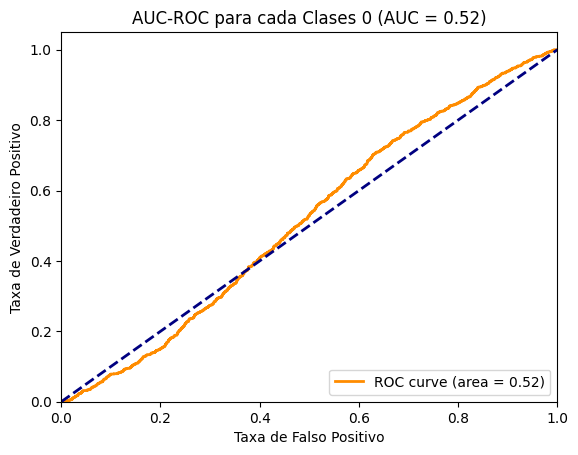

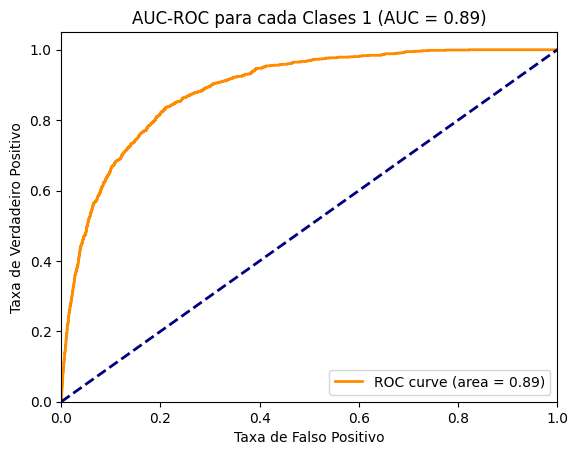

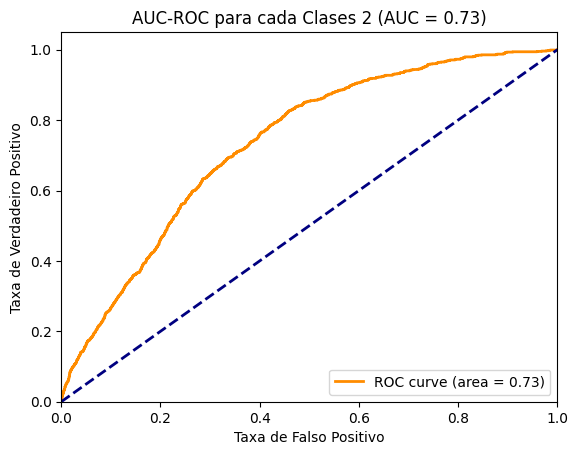

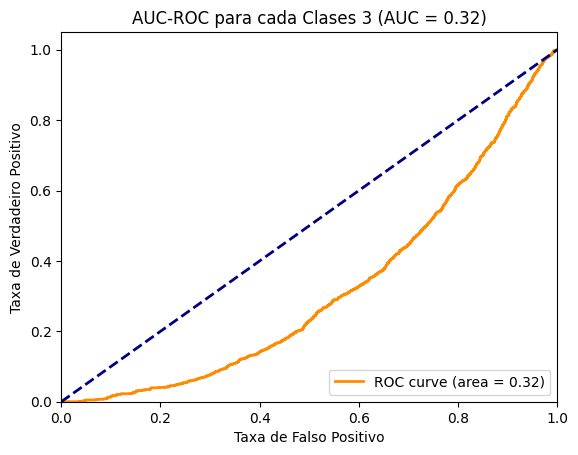

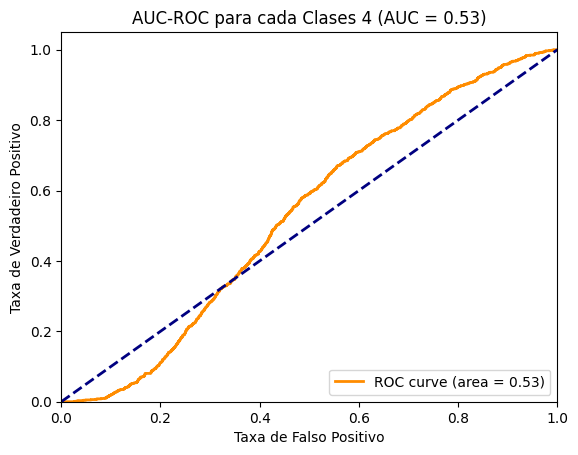

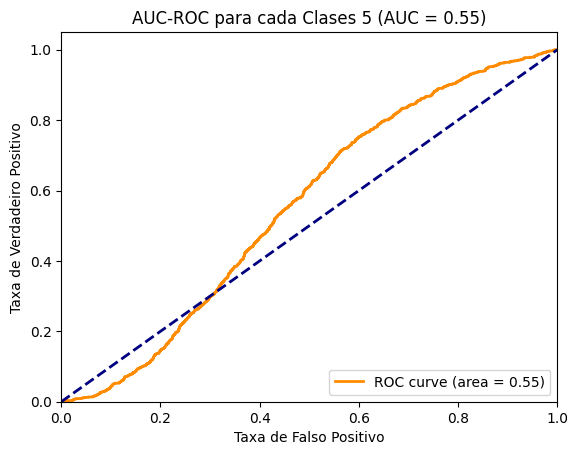

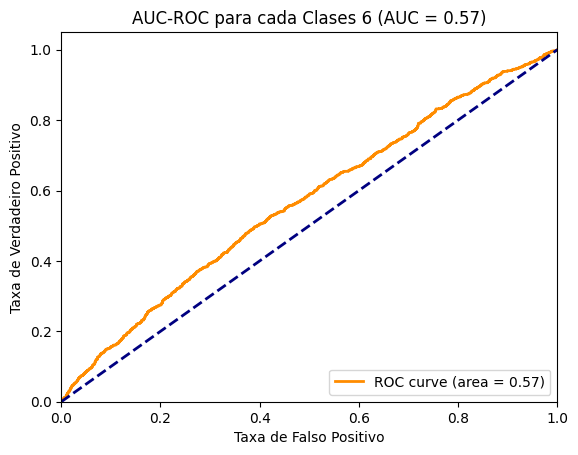

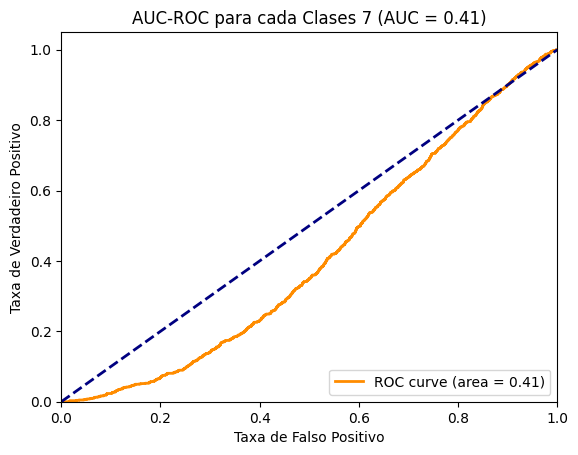

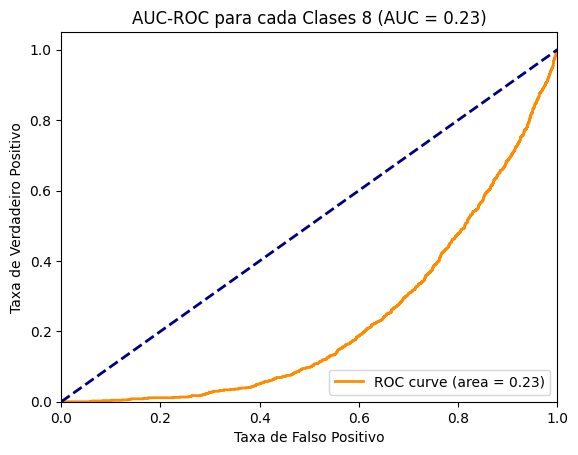

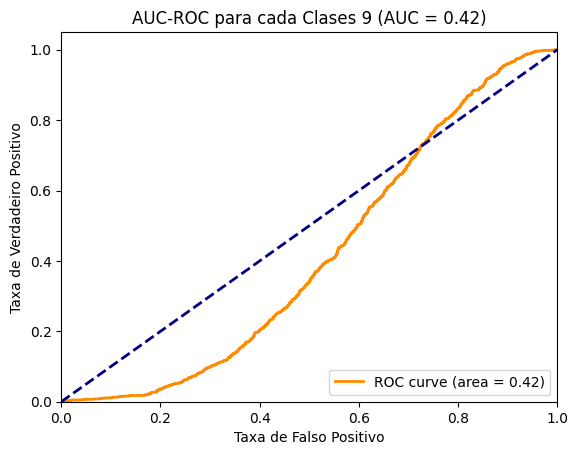

In [37]:
from sklearn.metrics import roc_curve, auc

for i in range(10):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title(f'AUC-ROC para cada Clases {i} (AUC = {roc_auc:.2f})')
    plt.legend(loc="lower right")
    plt.show()

## Imprimir scores auc

Exibir os scores AUC calculados para cada classe.


In [38]:
print("Scores AUC por classe:")
for i in range(10):
    print(f"Classe {i}: {auc_scores[i]:.4f}")

Scores AUC por classe:
Classe 0: 0.5157
Classe 1: 0.8892
Classe 2: 0.7333
Classe 3: 0.3187
Classe 4: 0.5298
Classe 5: 0.5530
Classe 6: 0.5668
Classe 7: 0.4117
Classe 8: 0.2304
Classe 9: 0.4162


## Resumo:

### Principais Descobertas da Análise de Dados

* Os scores AUC para cada classe foram calculados, mostrando diferentes níveis de poder discriminatório (por exemplo, a classe 1 teve um AUC de aproximadamente 0.889, enquanto a classe 8 teve um AUC muito baixo de aproximadamente 0.230).
* Curvas ROC para cada uma das 10 classes foram geradas e exibidas com sucesso, visualizando o trade-off entre a Taxa de Verdadeiros Positivos e a Taxa de Falsos Positivos em várias configurações de limiar para cada classe.
* Os scores AUC calculados para cada classe foram impressos, fornecendo um resumo numérico do desempenho do modelo por classe.

### Insights ou Próximos Passos

* Investigar as classes com baixos scores AUC (por exemplo, classe 8) para entender por que o modelo está tendo um desempenho ruim e explorar possíveis razões como desbalanceamento de classes, dados ruidosos ou limitações do modelo.
* Com base nas curvas ROC e scores AUC, considerar a implementação de estratégias específicas por classe para melhorar o desempenho do modelo para classes com baixo desempenho, como coletar mais dados para essas classes ou usar diferentes arquiteturas de modelo.